<a href="https://colab.research.google.com/github/yando6/PA_DatMin_A1K4/blob/main/Superviset_Dataset_A1K4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kelompok 4 A1

1. Muhammad Fathan Hari
2. Rizky Maulana Al Fauzan
3. Dhea Ayu Safitri

# Judul: Student Performance Data Set

link kaggle : https://www.kaggle.com/spscientist/students-performance-in-exams


#**Business Understanding**

Determine Business Objectives


*   Meningkatkan rata-rata nilai.
*   Memperbaiki faktor-faktor yang mempengaruhi kinerja siswa.
*   Mengevaluasi program pendidikan.





Assess Situation

Dataset ini dapat digunakan untuk mengidentifikasi masalah yang mungkin dihadapi oleh siswa dan mencari solusi untuk meningkatkan efektivitas pengajaran dan keterlibatan orang tua.


Determine Data Mining Goals

Mengidentifikasi faktor-faktor yang mempengaruhi kinerja siswa. 






Produce Project Plan




*   Pemilihan teknik dan algoritma yang tepat
*   Pemilihan parameter dan pengaturan model

*   Perancangan uji coba dan validasi model.

*   Evaluasi model.











#**Data Understanding**

## Collect Initial Data

  Data yang digunakan dalam analisis ini berasal dari Kaggle dengan link https://www.kaggle.com/spscientist/students-performance-in-exams. Dataset ini berisi informasi tentang nilai siswa pada tiga tes yang berbeda: math, reading, dan writing. Dataset ini memiliki 1000 baris dan 8 kolom.


In [ ]:
import pandas as pd

df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Pada tahap ini menggunakan Pandas untuk membaca data dari file csv dengan memanggil fungsi read_csv(). Kemudian, menggunakan fungsi head() untuk menampilkan lima baris pertama dari dataset. Hal ini berguna untuk memastikan bahwa data terimpor dengan benar dan memiliki format yang sesuai.

## Describe Data

  Berikut adalah deskripsi singkat dari setiap kolom dalam dataset ini:

  * gender: jenis kelamin siswa (laki-laki atau perempuan)
  * race/ethnicity: kelompok ras/etnis siswa (A, B, C, D, atau E)
  * parental level of education: tingkat pendidikan orang tua siswa (terendah hingga tertinggi)
  * lunch: jenis makanan siang siswa (berbayar atau gratis/reduksi harga)
  * test preparation course: apakah siswa mengikuti kursus persiapan tes (ya atau tidak)
  * math score: nilai matematika siswa (0 hingga 100)
  * reading score: nilai membaca siswa (0 hingga 100)
  * writing score: nilai menulis siswa (0 hingga 100)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Pada tahap ini, menggunakan fungsi info() untuk menampilkan informasi tentang dataset, termasuk jumlah baris dan kolom, nama kolom, tipe data, dan apakah ada nilai null atau tidak.

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Kemudian, menggunakan fungsi describe() untuk menampilkan statistik deskriptif dari setiap kolom numerik, termasuk mean, median, dan standar deviasi. Hal ini berguna untuk memahami struktur dan karakteristik data.

## Explore Data

  Langkah selanjutnya adalah eksplorasi data untuk memahami struktur dan karakteristik data. 
  * Membuat visualisasi untuk masing-masing kolom dan memeriksa apakah ada outliers atau nilai-nilai yang tidak masuk akal.


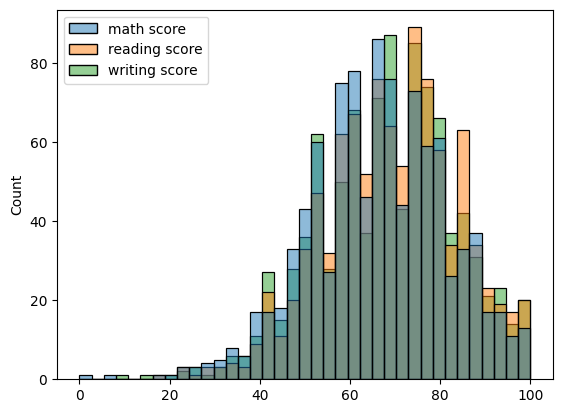

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df[['math score', 'reading score', 'writing score']])
plt.show()

Pada tahap ini, menggunakan library Seaborn dan Matplotlib untuk membuat visualisasi dari setiap kolom dalam dataset. Pertama, menggunakan fungsi histplot() untuk membuat histogram untuk setiap kolom numerik. Histogram berguna untuk memahami distribusi data.

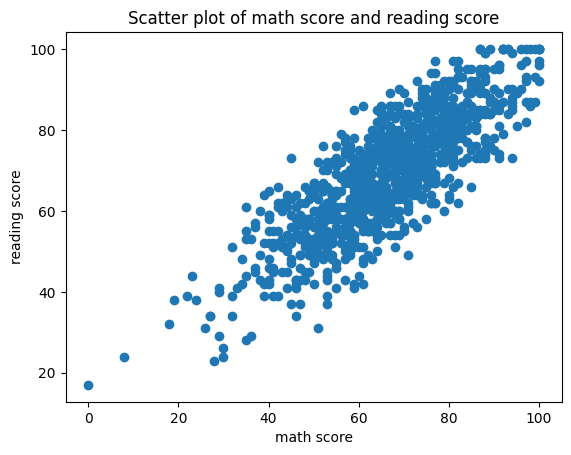

In [ ]:
# membuat scatter plot dari kolom math_score dan reading_score
plt.scatter(x=df['math score'], y=df['reading score'])
plt.title('Scatter plot of math score and reading score')
plt.xlabel('math score')
plt.ylabel('reading score')
plt.show()

Kode di atas membuat scatter plot dari kolom math score dan reading score pada dataset yang telah dibaca sebelumnya menggunakan library matplotlib.

Selanjutnya, kode memberikan judul dan label pada sumbu x dan y. Sumbu x diberi label math score, sedangkan sumbu y diberi label reading score. Judul plot adalah 'Scatter plot of math score and reading score'.

Terakhir, plot ditampilkan menggunakan perintah plt.show(). Hasilnya adalah plot scatter yang menunjukkan titik-titik pada koordinat yang merepresentasikan nilai-nilai dalam kolom math score dan reading score dari dataset.

In [ ]:
# menghitung rentang IQR pada kolom math score
q1 = df['math score'].quantile(0.25)
q3 = df['math score'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
filter_math = (df['math score'] >= lower_bound) & (df['math score'] <= upper_bound)
df_no_outliers_math = df[filter_math].reset_index(drop=True)
print("Jumlah data sebelum penghapusan outlier pada kolom math score: ", len(df))
print("Jumlah data setelah penghapusan outlier pada kolom math score: ", len(df_no_outliers_math))

Jumlah data sebelum penghapusan outlier pada kolom math score:  1000
Jumlah data setelah penghapusan outlier pada kolom math score:  992


In [ ]:
# menghitung rentang IQR pada kolom reading score
q1_reading = df['reading score'].quantile(0.25)
q3_reading = df['reading score'].quantile(0.75)
iqr_reading = q3_reading - q1_reading
upper_bound_reading = q3_reading + 1.5 * iqr_reading
lower_bound_reading = q1_reading - 1.5 * iqr_reading
filter_reading = (df['reading score'] >= lower_bound_reading) & (df['reading score'] <= upper_bound_reading)
df_no_outliers_reading = df[filter_reading].reset_index(drop=True)
print("Jumlah data sebelum penghapusan outlier pada kolom reading score: ", len(df))
print("Jumlah data setelah penghapusan outlier pada kolom reading score: ", len(df_no_outliers_reading))

Jumlah data sebelum penghapusan outlier pada kolom reading score:  1000
Jumlah data setelah penghapusan outlier pada kolom reading score:  994


In [ ]:
# menghitung rentang IQR pada kolom writing score
q1_writing = df['writing score'].quantile(0.25)
q3_writing = df['writing score'].quantile(0.75)
iqr_writing = q3_writing - q1_writing
upper_bound_writing = q3_writing + 1.5 * iqr_writing
lower_bound_writing = q1_writing - 1.5 * iqr_writing
filter_writing = (df['writing score'] >= lower_bound_writing) & (df['writing score'] <= upper_bound_writing)
df_no_outliers_writing = df[filter_writing].reset_index(drop=True)
print("Jumlah data sebelum penghapusan outlier pada kolom writing score: ", len(df))
print("Jumlah data setelah penghapusan outlier pada kolom writing score: ", len(df_no_outliers_writing))

Jumlah data sebelum penghapusan outlier pada kolom writing score:  1000
Jumlah data setelah penghapusan outlier pada kolom writing score:  995


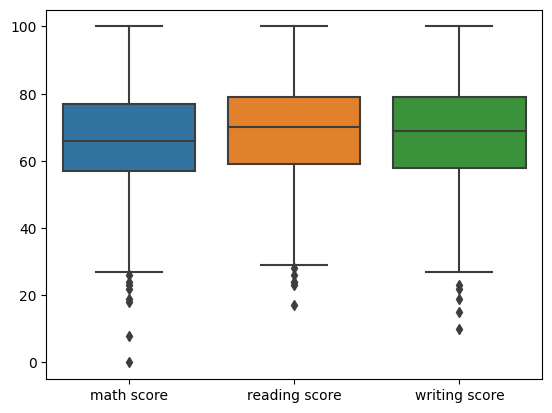

In [ ]:
# membuat boxplot untuk setiap kolom numerik
sns.boxplot(data=df[['math score', 'reading score', 'writing score']])
plt.show()

Kemudian, menggunakan fungsi boxplot() untuk membuat boxplot untuk setiap kolom numerik. Boxplot berguna untuk menemukan outliers atau nilai-nilai yang tidak masuk akal.

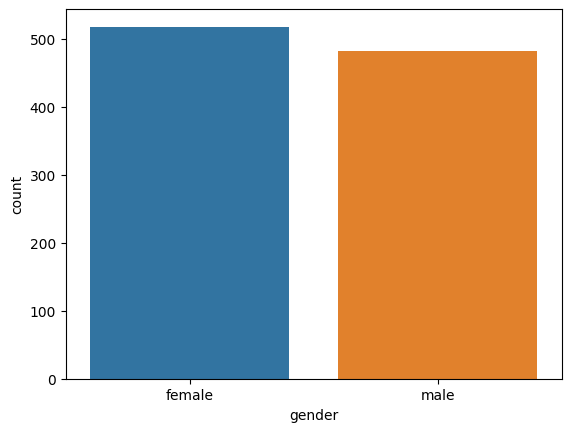

In [ ]:
# membuat countplot untuk setiap kolom kategorikal
sns.countplot(data=df, x='gender')
plt.show()

Selanjutnya, menggunakan fungsi countplot() untuk membuat countplot untuk setiap kolom kategorikal. Countplot berguna untuk memahami frekuensi data pada setiap kategori.

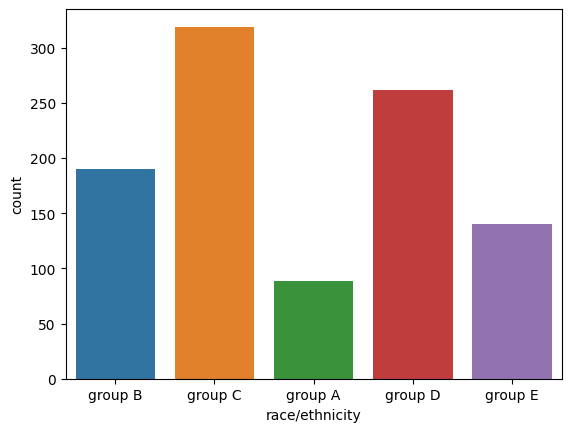

In [ ]:
sns.countplot(data=df, x='race/ethnicity')
plt.show()

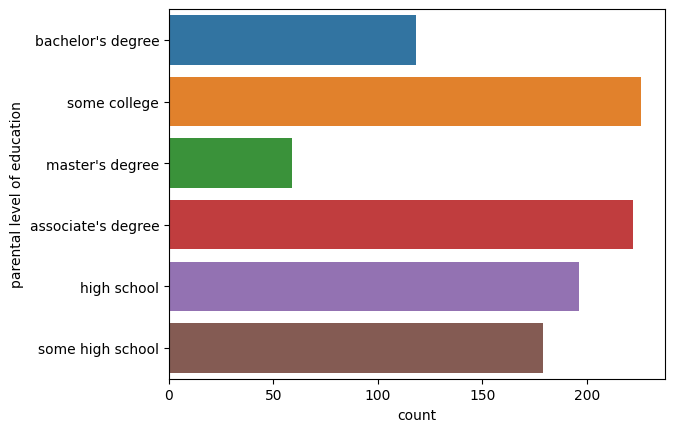

In [ ]:
sns.countplot(data=df, y='parental level of education')
plt.show()

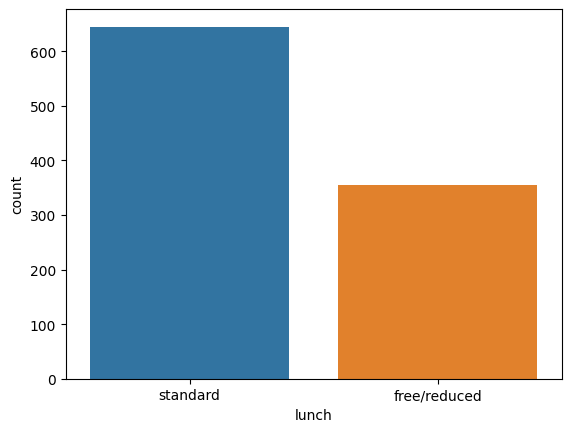

In [ ]:
sns.countplot(data=df, x='lunch')
plt.show()

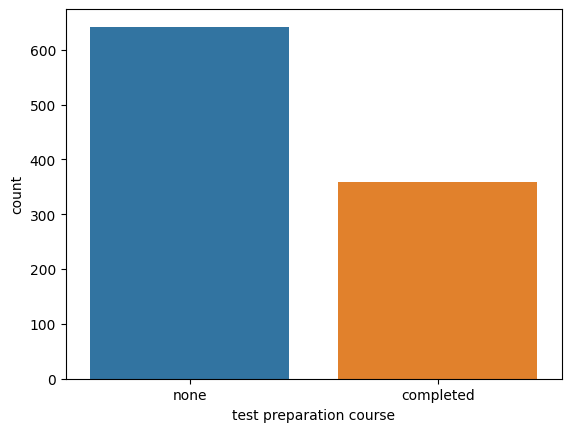

In [ ]:
sns.countplot(data=df, x='test preparation course')
plt.show()

## Verify Data Quality

  Langkah terakhir adalah memastikan kualitas data yang baik. Beberapa hal yang perlu diperiksa adalah:
  * Memeriksa apakah ada data yang hilang dan memutuskan apakah data tersebut harus diisi atau dihapus.

In [ ]:
# mengecek apakah ada data yang duplikat
df.duplicated().sum()
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Pada tahap ini, menggunakan fungsi duplicated() untuk mengecek apakah ada data yang duplikat. Fungsi ini akan mengembalikan jumlah data yang duplikat. Kemudian, menggunakan fungsi isnull() untuk mengecek apakah ada data yang hilang. Fungsi ini akan mengembalikan jumlah data yang kosong untuk setiap kolom. Hal ini berguna untuk memastikan kualitas data yang baik sebelum melakukan analisis lebih lanjut.

#**Data Preparation**

## Clean Data

In [ ]:
# Clean data
df_cleaned = df.dropna(subset=['math score'])
df_cleaned.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Pada kode di atas, menggunakan fungsi dropna() untuk menghapus baris yang memiliki nilai kosong pada kolom "math score". Menyimpan hasil pembersihan data ke dalam variabel df_cleaned. Terakhir,  mencetak lima baris pertama dari data yang sudah dibersihkan menggunakan fungsi head().







## Construct Data

In [ ]:
# Construct data
df['pass_math'] = df['math score'] >= 60
df['pass_reading'] = df['reading score'] >= 60
df['pass_writing'] = df['writing score'] >= 60
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
df['pass'] = df['average_score'].apply(lambda x: 1 if x >= 60 else 0)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,pass_reading,pass_writing,average_score,pass
0,female,group B,bachelor's degree,standard,none,72,72,74,True,True,True,72.666667,1
1,female,group C,some college,standard,completed,69,90,88,True,True,True,82.333333,1
2,female,group B,master's degree,standard,none,90,95,93,True,True,True,92.666667,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,False,False,False,49.333333,0
4,male,group C,some college,standard,none,76,78,75,True,True,True,76.333333,1


Pada kode di atas, menggunakan operator indexing [] untuk menambahkan kolom baru pada dataset dengan nama "pass_math". Kolom baru ini menunjukkan apakah nilai matematika seseorang lulus atau tidak (dengan batas kelulusan 60). Menyimpan dataset yang sudah diubah ke dalam variabel df. Terakhir, mencetak lima baris pertama dari data yang sudah diubah menggunakan fungsi head().

## Integrate Data

Pada tahap ini, kita dapat menggabungkan data dari beberapa sumber. Namun, pada dataset ini, tidak diperlukan proses integrasi data.

Karena dataset "Students Performance in Exams" hanya terdiri dari satu file CSV, tidak ada proses integrasi data yang diperlukan.

## Format Data

In [ ]:
# Ubah data kategorikal menjadi numerik
df['gender'] = df['gender'].map({'female': 0, 'male': 1})
df['race/ethnicity'] = df['race/ethnicity'].map({'group A': 0, 'group B': 1, 'group C': 2, 'group D': 3, 'group E': 4})
df['parental level of education'] = df['parental level of education'].map({'some high school': 0, 'high school': 1, 'some college': 2, "associate's degree": 3, "bachelor's degree": 4, "master's degree": 5})
df['lunch'] = df['lunch'].map({'standard': 0, 'free/reduced': 1})
df['test preparation course'] = df['test preparation course'].map({'none': 0, 'completed': 1})
df['pass_math'] = df['math score'].apply(lambda x: 1 if x >= 60 else 0)
df['pass_reading'] = df['reading score'].apply(lambda x: 1 if x >= 60 else 0)
df['pass_writing'] = df['writing score'].apply(lambda x: 1 if x >= 60 else 0)
print(df)

     gender  race/ethnicity  parental level of education  lunch  \
0         0               1                            4      0   
1         0               2                            2      0   
2         0               1                            5      0   
3         1               0                            3      1   
4         1               2                            2      0   
..      ...             ...                          ...    ...   
995       0               4                            5      0   
996       1               2                            1      1   
997       0               2                            1      1   
998       0               3                            2      0   
999       0               3                            2      1   

     test preparation course  math score  reading score  writing score  \
0                          0          72             72             74   
1                          1          69       

#**Modeling**

* **NAIVE BAYES**

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X = df[['math score', 'reading score', 'writing score', 'gender', 'race/ethnicity', 'parental level of education', 'lunch']]
y = df[['pass']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = MinMaxScaler()
X_train[['math score', 'reading score', 'writing score', 'race/ethnicity', 'parental level of education', 'lunch']] = scaler.fit_transform(X_train[['math score', 'reading score', 'writing score', 'race/ethnicity', 'parental level of education', 'lunch']])
X_test[['math score', 'reading score', 'writing score', 'race/ethnicity', 'parental level of education', 'lunch']] = scaler.transform(X_test[['math score', 'reading score', 'writing score', 'race/ethnicity', 'parental level of education', 'lunch']])

In [ ]:
# Training model Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
import numpy as np

# Mengambil probabilitas fitur berdasarkan kelas target
class_labels = nb.classes_
feature_importance = pd.DataFrame(data=np.exp(nb.theta_), columns=X_train.columns, index=class_labels)
print("Probabilitas Fitur Berdasarkan Kelas Target:")
print(feature_importance)

Probabilitas Fitur Berdasarkan Kelas Target:
   math score  reading score  writing score    gender  race/ethnicity  \
0    1.568865       1.448770       1.505166  1.796042        1.624760   
1    2.024034       1.986465       2.030504  1.578930        1.760757   

   parental level of education     lunch  
0                     1.418428  1.693889  
1                     1.550238  1.328084  


In [ ]:
# Melakukan prediksi pada data baru
new_data = df.sample(frac=0.2, random_state=1)[['math score', 'reading score', 'writing score', 'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'pass']]
new_data_scaled = scaler.transform(new_data[['math score', 'reading score', 'writing score', 'race/ethnicity', 'parental level of education', 'lunch']])
new_data_scaled = np.hstack((new_data_scaled, new_data[['pass']].values))
predictions = nb.predict(new_data_scaled)

print(pd.DataFrame(new_data, columns=['math score', 'reading score', 'writing score', 'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'pass']))

     math score  reading score  writing score  gender  race/ethnicity  \
507          55             59             54       1               1   
818          60             72             68       0               1   
452          65             77             74       0               2   
368          44             64             58       0               0   
242          56             52             55       0               3   
..          ...            ...            ...     ...             ...   
430          64             66             59       1               2   
874          43             62             61       0               2   
550          79             76             65       1               2   
608          61             64             62       0               4   
207          81             80             76       1               4   

     parental level of education  lunch  pass  
507                            4      1     0  
818                        

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
# Evaluasi model Naive Bayes
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    print("Accuracy:", round(accuracy, 4))
    print("Precision:", round(precision, 4))
    print("Recall:", round(recall, 4))
    print("F1 Score:", round(f1, 4))
    print("ROC AUC:", round(roc_auc, 4))

evaluate_model(nb, X_test, y_test)

Accuracy: 0.98
Precision: 0.9854
Recall: 0.9854
F1 Score: 0.9854
ROC AUC: 0.9768


* **KNN**

In [ ]:
import pandas as pd
import numpy as np
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

X = df[['math score', 'reading score', 'writing score', 'gender', 'race/ethnicity', 'parental level of education', 'lunch']]
y = df['pass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Inisialisasi parameter K
k_range = range(1, 31)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
accuracy_scores = []

for k in k_range:
    fold_scores = []
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        y_val_pred = predict(X_train_fold, y_train_fold, X_val_fold.values, k)
        
        fold_accuracy = sum(y_val_pred == y_val_fold) / len(y_val_fold)
        fold_scores.append(fold_accuracy)
    
    avg_accuracy = sum(fold_scores) / len(fold_scores)
    accuracy_scores.append(avg_accuracy)
    
best_k = k_range[np.argmax(accuracy_scores)]
print("K terbaik adalah:", best_k)

K terbaik adalah: 28


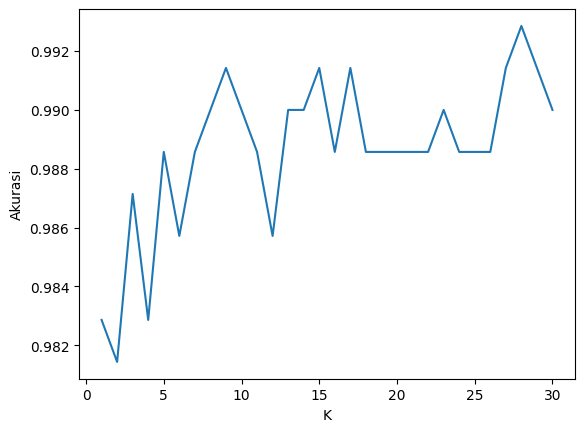

In [ ]:
# Plot nilai akurasi untuk setiap nilai K
import matplotlib.pyplot as plt

plt.plot(k_range, accuracy_scores)
plt.xlabel('K')
plt.ylabel('Akurasi')
plt.show()

In [ ]:
# Fungsi untuk menghitung jarak antara dua titik
def euclidean_distance(point1, point2):
    distance = 0
    for i in range(len(point1)):
        distance += (point1[i] - point2[i]) ** 2
    return math.sqrt(distance)

In [ ]:
# Fungsi untuk memprediksi kelas target menggunakan KNN
def predict(X_train, y_train, X_test, k):
    predictions = []
    for i in range(len(X_test)):
        distances = []
        for j in range(len(X_train)):
            distance = euclidean_distance(X_test[i], X_train.iloc[j])
            distances.append((distance, y_train.iloc[j]))
        distances.sort()
        neighbors = []
        for n in range(k):
            neighbors.append(distances[n][1])
        predictions.append(max(set(neighbors), key=neighbors.count))
    return predictions

In [ ]:
# Melakukan prediksi data testing dengan KNN
y_pred = predict(X_train, y_train, X_test.values, 3)
evaluate_model(KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train), X_test, y_test)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    print("Accuracy:", round(accuracy, 4))
    print("Precision:", round(precision, 4))
    print("Recall:", round(recall, 4))
    print("F1 Score:", round(f1, 4))
    print("ROC AUC:", round(roc_auc, 4))

Accuracy: 0.97
Precision: 0.9853
Recall: 0.971
F1 Score: 0.9781
ROC AUC: 0.9694


**C4.5**


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Hitung entropy dari sebuah himpunan data
def entropy(data):
    label_column = data.iloc[:, -1]
    _, counts = np.unique(label_column, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
    return entropy

In [ ]:
# Hitung information gain dari sebuah fitur
def information_gain(data, feature_column):
    total_entropy = entropy(data)
    values, counts = np.unique(data[feature_column], return_counts=True)
    probabilities = counts / counts.sum()
    entropies = []
    for value in values:
        subset = data[data[feature_column] == value]
        subset_entropy = entropy(subset)
        entropies.append(subset_entropy)
    weighted_entropy = sum(probabilities * entropies)
    information_gain = total_entropy - weighted_entropy
    return information_gain

In [ ]:
# Pilih fitur terbaik yang akan digunakan sebagai pemisah
def choose_best_feature(data, features):
    information_gains = [information_gain(data, feature) for feature in features]
    best_feature_index = np.argmax(information_gains)
    best_feature = features[best_feature_index]
    return best_feature

In [ ]:
# Buat pohon keputusan
def create_decision_tree(data, original_data, features):
    if len(np.unique(data.iloc[:, -1])) <= 1:
        return np.unique(data.iloc[:, -1])[0]
    elif len(features) == 0:
        return np.unique(original_data.iloc[:, -1])[np.argmax(np.unique(original_data.iloc[:, -1], return_counts=True)[1])]
    else:
        best_feature = choose_best_feature(data, features)
        tree = {best_feature: {}}
        features = [feature for feature in features if feature != best_feature]
        for value in np.unique(data[best_feature]):
            subset = data[data[best_feature] == value]
            subtree = create_decision_tree(subset, original_data, features)
            tree[best_feature][value] = subtree

        return tree

In [ ]:
# Memisahkan data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3, random_state=42)

In [ ]:
# Membuat pohon keputusan dengan menggunakan data training
tree = create_decision_tree(pd.concat([X_train, y_train], axis=1), pd.concat([X_train, y_train], axis=1), X_train.columns)

In [ ]:
# Melakukan prediksi pada data testing
y_pred = []
for _, sample in X_test.iterrows():
    current_node = tree
    while isinstance(current_node, dict):
        feature = list(current_node.keys())[0]
        value = sample[feature]
        if value in current_node[feature]:
            current_node = current_node[feature][value]
        else:
            current_node = np.unique(y_train)[np.argmax(np.unique(y_train, return_counts=True)[1])]
    y_pred.append(current_node)

In [ ]:
# Mencetak matriks evaluasi
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))
print('F1 Score:', f1_score(y_test, y_pred, average='macro'))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred, multi_class='ovo'))

Confusion Matrix:
 [[ 77  17]
 [  0 206]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90        94
           1       0.92      1.00      0.96       206

    accuracy                           0.94       300
   macro avg       0.96      0.91      0.93       300
weighted avg       0.95      0.94      0.94       300

Accuracy: 0.9433333333333334
Precision: 0.9618834080717489
Recall: 0.9095744680851063
F1 Score: 0.930478877847299
ROC AUC Score: 0.9095744680851064


#**Evaluation**

In [ ]:
# Membuat dataframe untuk menyimpan hasil evaluasi
eval_df = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

In [ ]:
# Menambahkan hasil evaluasi naive bayes ke dataframe
eval_df = eval_df.append({'Algorithm': 'Naive Bayes', 
                          'Accuracy': 0.98, 
                          'Precision': 0.9854, 
                          'Recall': 0.9854, 
                          'F1 Score': 0.9854, 
                          'ROC AUC': 0.9768}, 
                         ignore_index=True)

<ipython-input-118-aeebba37aea3>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append({'Algorithm': 'Naive Bayes',


In [ ]:
# Menambahkan hasil evaluasi knn ke dataframe
eval_df = eval_df.append({'Algorithm': 'KNN', 
                          'Accuracy': 0.97, 
                          'Precision': 0.9853, 
                          'Recall': 0.971, 
                          'F1 Score': 0.9781, 
                          'ROC AUC': 0.9694}, 
                         ignore_index=True)

<ipython-input-119-57b7378e5da7>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append({'Algorithm': 'KNN',


In [ ]:
# Menambahkan hasil evaluasi c4.5 ke dataframe
eval_df = eval_df.append({'Algorithm': 'C4.5', 
                          'Accuracy': 0.9433333333333334, 
                          'Precision': 0.9618834080717489, 
                          'Recall': 0.9095744680851063, 
                          'F1 Score': 0.930478877847299, 
                          'ROC AUC': 0.9095744680851064}, 
                         ignore_index=True)

<ipython-input-120-9f15eafb858c>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append({'Algorithm': 'C4.5',


In [ ]:
# Mencari nilai F1 Score terbesar dan identifikasi algoritma yang memberikan kinerja terbaik
best_algorithm = eval_df.loc[eval_df['F1 Score'].idxmax()]['Algorithm']
eval_df
print("Best algorithm: ", best_algorithm)

Best algorithm:  Naive Bayes


#**Deployment**

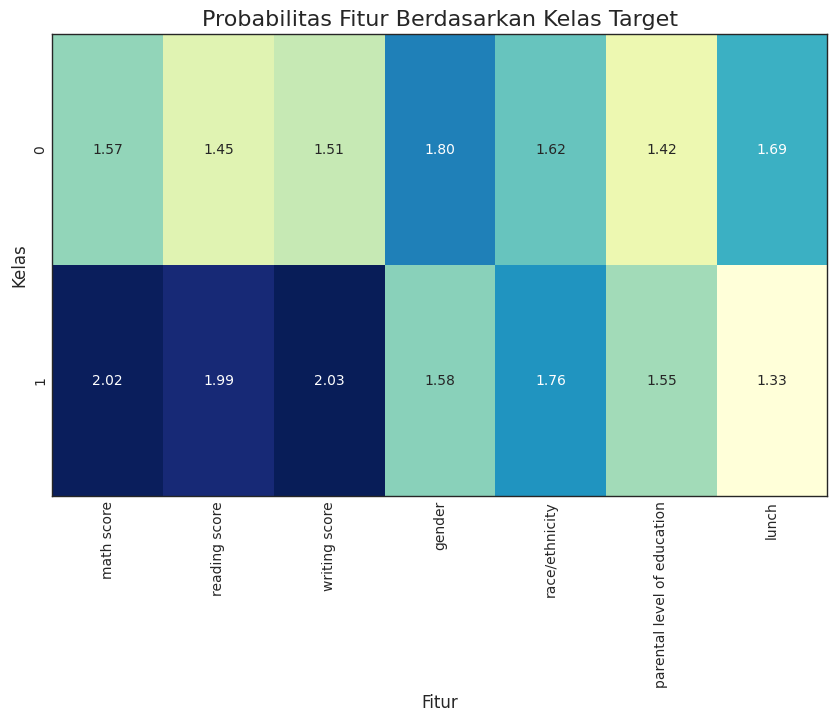

In [ ]:
import seaborn as sns

# Mengambil probabilitas fitur berdasarkan kelas target
feature_importance = pd.DataFrame(data=np.exp(nb.theta_), columns=X_train.columns, index=class_labels)

# Membuat heatmap untuk probabilitas fitur
plt.figure(figsize=(10, 6))
sns.set_style("white")
sns.heatmap(feature_importance, annot=True, cmap='YlGnBu', fmt=".2f", cbar=False)
plt.title('Probabilitas Fitur Berdasarkan Kelas Target', fontsize=16)
plt.xlabel('Fitur', fontsize=12)
plt.ylabel('Kelas', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
for _, spine in plt.gca().spines.items():
    spine.set_visible(True)

plt.show()

## Link Google Studio
https://lookerstudio.google.com/reporting/bed4fce1-67c2-410b-8265-b2cbab897fcd

## Link Power Point
https://www.canva.com/design/DAFhW0Yasgw/xZb8LaWsdAeYwrqXAMJDnQ/edit?utm_content=DAFhW0Yasgw&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton